In [70]:
# Import libraries

from PIL import Image
import numpy
import matplotlib.pyplot as plt
import scipy.optimize as opt
import numpy as np
import pylab as plt

In [71]:
#Define fit function

def twoD_Gaussian(xdata_tuple, amplitude, xo, yo, sigma_x, sigma_y, offset):
    (x, y) = xdata_tuple                                                        
    xo = float(xo)                                                              
    yo = float(yo)                                                              
    a = 1/(2*sigma_x**2)      
    c = 1/(2*sigma_y**2)   
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + c*((y-yo)**2)))      
                                  
    return g.ravel()

In [72]:
#Import image
im_name="test.png"
img= Image.open(im_name)
np_img = numpy.array(img)

data=np_img[:,:,0]


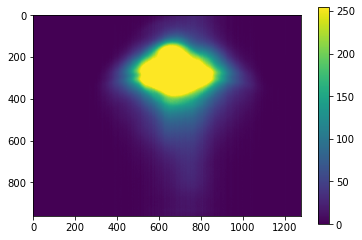

In [73]:
# Create x and y indices
x0 = np.linspace(0, np.shape(data)[1], np.shape(data)[1])
y0 = np.linspace(0, np.shape(data)[0], np.shape(data)[0])
x, y = np.meshgrid(x0, y0,indexing='ij')

# plot twoD_Gaussian data generated above
plt.figure()
plt.imshow(data)
plt.colorbar();


In [74]:
# Fit data

#amplitude, xo, yo, sigma_x, sigma_y, offset
initial_guess = (250,700,200,200,200,10)

popt, pcov = opt.curve_fit(twoD_Gaussian, (x, y), np.ravel(data), p0=initial_guess)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1400.

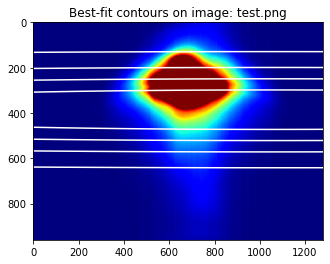

BEAM PARAMETERS
Amplitude: 91.958
X0: 1054.955
Y0: 385.243
sigma_x: 3507.051
sigma_y: 132.118
Offset: 6.039


In [78]:
# plot fit

data_fitted = twoD_Gaussian((x, y), *popt)

fig, ax = plt.subplots(1, 1)
ax.imshow(data.reshape(np.shape(data)[0], np.shape(data)[1]), cmap=plt.cm.jet)
ax.contour(x, y, data_fitted.reshape(np.shape(data)[1], np.shape(data)[0]), 5, colors='w')
plt.title('Best-fit contours on image: '+im_name)
plt.show();

print('BEAM PARAMETERS')
print('Amplitude:',round(popt[0],3))
print('X0:',round(popt[1],3))
print('Y0:',round(popt[2],3))
print('sigma_x:',round(popt[3],3))
print('sigma_y:',round(popt[4],3))
print('Offset:',round(popt[5],3))